### Setup and Importing pre-requisite libraries

In [1]:
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

### Create a basic model of the form y = mx + c

In [2]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 785us/step - loss: 0.7825
Epoch 2/200
1/1 [==============================] - 0s 726us/step - loss: 0.7369
Epoch 3/200
1/1 [==============================] - 0s 652us/step - loss: 0.6985
Epoch 4/200
1/1 [==============================] - 0s 686us/step - loss: 0.6658
Epoch 5/200
1/1 [==============================] - 0s 865us/step - loss: 0.6377
Epoch 6/200
1/1 [==============================] - 0s 973us/step - loss: 0.6133
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5918
Epoch 8/200
1/1 [==============================] - 0s 815us/step - loss: 0.5726
Epoch 9/200
1/1 [==============================] - 0s 832us/step - loss: 0.5553
Epoch 10/200
1/1 [==============================] - 0s 714us/step - loss: 0.5396
Epoch 11/200
1/1 [==============================] - 0s 749us/step - loss: 0.5251
Epoch 12/200
1/1 [==============================] - 0s 769us/step - loss: 0.5116
Epoch 13/200
1/1 [=====================

1/1 [==============================] - 0s 798us/step - loss: 0.0773
Epoch 103/200
1/1 [==============================] - 0s 613us/step - loss: 0.0757
Epoch 104/200
1/1 [==============================] - 0s 582us/step - loss: 0.0742
Epoch 105/200
1/1 [==============================] - 0s 645us/step - loss: 0.0727
Epoch 106/200
1/1 [==============================] - 0s 656us/step - loss: 0.0712
Epoch 107/200
1/1 [==============================] - 0s 600us/step - loss: 0.0697
Epoch 108/200
1/1 [==============================] - 0s 589us/step - loss: 0.0683
Epoch 109/200
1/1 [==============================] - 0s 734us/step - loss: 0.0669
Epoch 110/200
1/1 [==============================] - 0s 786us/step - loss: 0.0655
Epoch 111/200
1/1 [==============================] - 0s 681us/step - loss: 0.0641
Epoch 112/200
1/1 [==============================] - 0s 652us/step - loss: 0.0628
Epoch 113/200
1/1 [==============================] - 0s 575us/step - loss: 0.0615
Epoch 114/200
1/1 [===========

### Generate a saved model or Save a model

In [7]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1/assets


### Convert saved model to TF Lite

In [8]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [10]:
type(tflite_model)

bytes

In [18]:
tflite_model_file = pathlib.Path('regression_model.tflite')
tflite_model_file.write_bytes(tflite_model)

768

### Initialize the TFLite interpreter to try it out

In [19]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

In [21]:
outputs

[0.65714043,
 1.042484,
 -0.51598597,
 0.021764398,
 0.13790256,
 0.12160897,
 0.2708252,
 0.092045724,
 -0.8521967,
 -0.379157,
 0.39808422,
 0.3868932,
 -0.59927005,
 0.14013928,
 0.14224178,
 0.27632993,
 0.76961833,
 -0.50799656,
 0.43024093,
 -0.6002897,
 0.6274764,
 0.26285666,
 -0.80530125,
 0.61336356,
 -0.18957633,
 0.14494497,
 -0.18411058,
 -0.16747743,
 0.3490191,
 0.11610323,
 0.07464695,
 0.030646503,
 -0.5383531,
 -0.586219,
 0.023946106,
 -0.60983837,
 0.6940128,
 0.31981975,
 -0.23356903,
 0.570587,
 0.105409205,
 -0.28504908,
 0.53085786,
 0.36105877,
 -0.5142311,
 0.48924595,
 0.8894543,
 0.13583773,
 0.91206807,
 -0.66742504,
 0.28117234,
 -0.2405389,
 0.7730573,
 0.379829,
 -0.34447777,
 -0.47384873,
 -0.77503926,
 0.055270135,
 -0.35353363,
 0.48556572,
 -0.7542261,
 0.14275163,
 0.40020877,
 0.0968039,
 0.5252034,
 0.7599129,
 -0.04240161,
 0.19918114,
 -0.09741342,
 1.0215607,
 0.6550738,
 0.14450389,
 -0.19929665,
 0.5018745,
 -0.37186676,
 0.8721002,
 0.286612

### Visualize the model

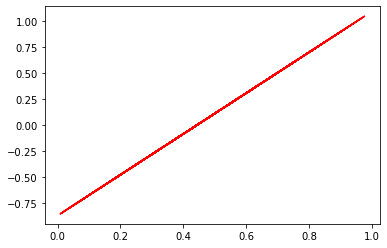

In [22]:
plt.plot(inputs, outputs, 'r')
plt.show()

## Download the TFLite model file

In [23]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass